In [30]:
pip install ../../

Processing /home/mehdi/Straph
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=139903 sha256=109fe8dde3a5e65e481a6b64fbc62fd066433d6f50c71b9a08bf4a4975ac1eef
  Stored in directory: /tmp/pip-ephem-wheel-cache-_j31eip_/wheels/a5/b6/52/18c617da8ab7981501f28a49d398fa4ccca532d1baece44b1e
Successfully built straph
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3
You should consider upgrading via the '/home/mehdi/sage/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may 

In [1]:
#sigmasv_links.sg
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,20)
import straph as sg
import straph.betweenness as bt
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "latapy_test_intro_nodes.sg",
                      path_links=path_directory + "latapy_test_intro_links.sg")
S.describe()

Nb of Nodes :  5
Nb of segmented nodes :  5.0
Nb of links :  12
Nb of segmented links :  32.0
Nb of event times :  26


<AxesSubplot:xlabel='t', ylabel='Nodes'>

findfont: Font family ['Garamond'] not found. Falling back to DejaVu Sans.


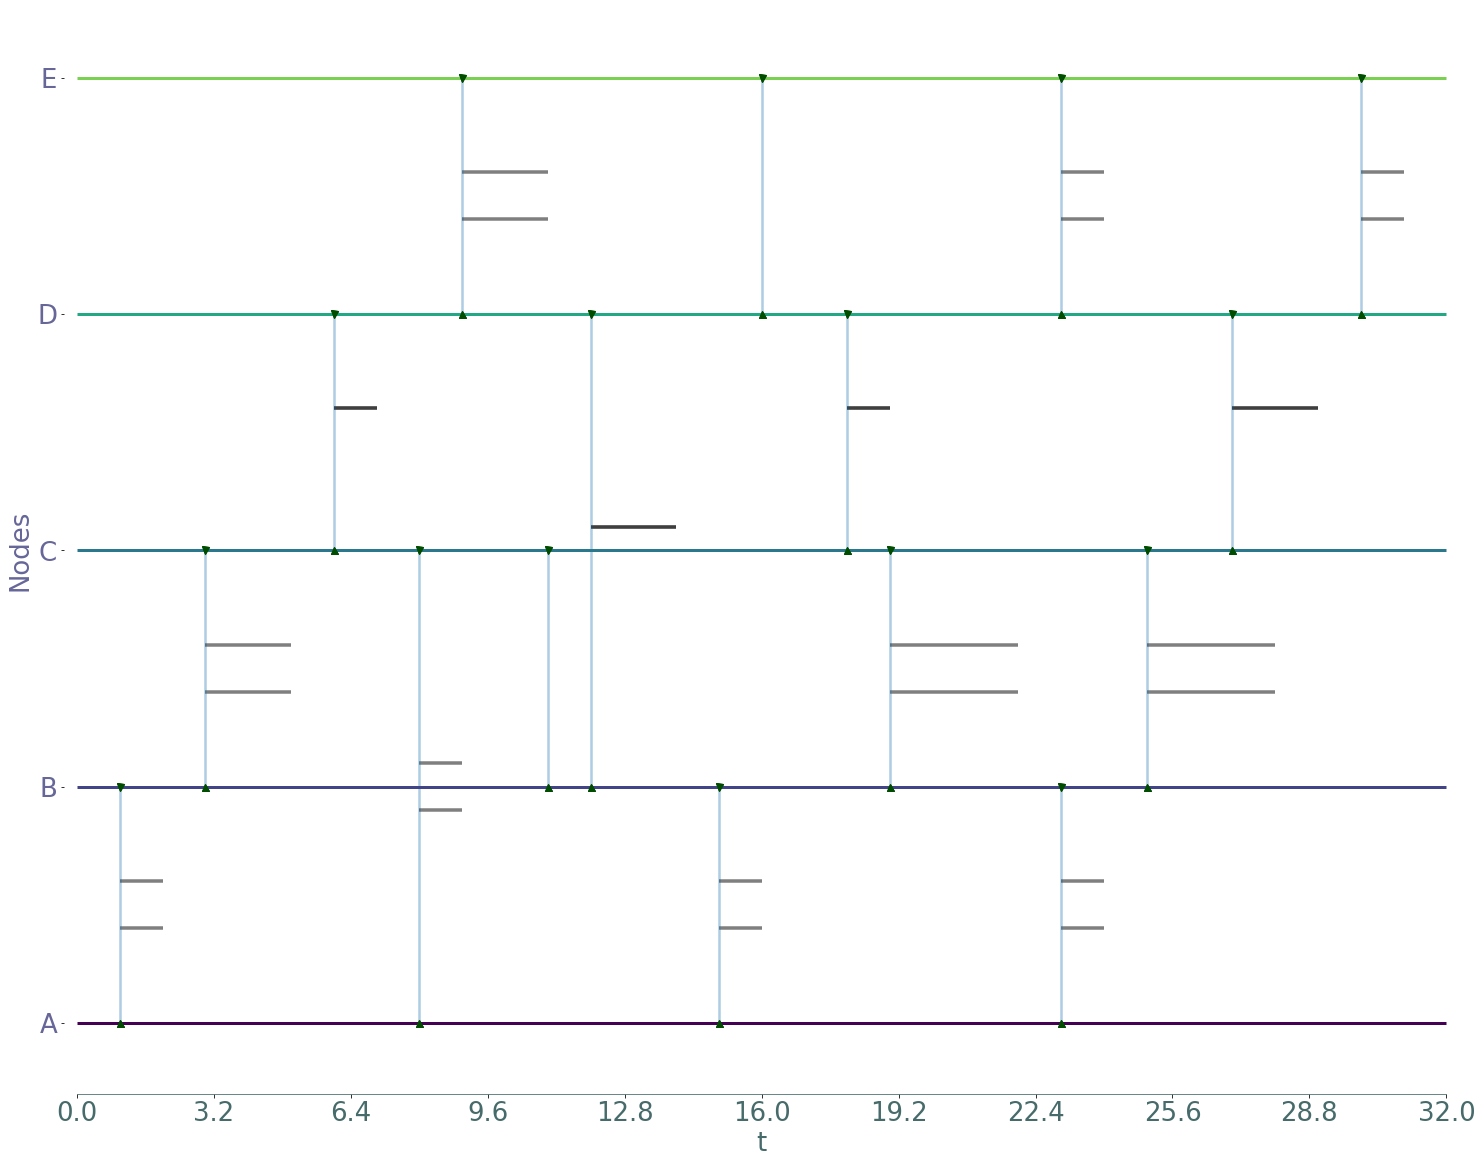

In [2]:
S.plot()

In [3]:
#for i in range(0,2*int(max(list(S.event_times())))):
#    S.add_point(i/2)
nouveau = S.fragmented_stream_graph()
#nouveau.plot()
#plt.savefig("link_s_con.png",dpi=300,bbox_inches ='tight' )

In [4]:
node = 0

In [5]:
events = list(nouveau.event_times())
events.sort()
events_reverse = dict()
for i in range(0,len(events)):
    events_reverse[events[i]] = i 

In [6]:
link_ind = bt.link_index(nouveau)

In [7]:
neighbors, neighbors_inv = bt.neighbors_direct(nouveau)
unt = bt.until(nouveau, events, events_reverse)

In [8]:
pre, cur_best = bt.dijkstra_directed(nouveau, node, events, events_reverse, neighbors, link_ind, neighbors_inv, unt)

In [9]:
cur_b_arr = bt. cur_best_to_array(nouveau, cur_best, events, events_reverse)
lat = bt.latencies(nouveau, cur_b_arr, events, events_reverse)
lat3, lat_rev3 = nouveau.latencies_without_0_and_rev(lat, events)

In [10]:
G = bt.predecessor_graph(nouveau, pre,node)

In [11]:
GG = bt.graph_to_ordered(G, events, events_reverse)

In [12]:
Gp = bt.instant_graphs(G)

In [13]:
import networkx as nx
GT = dict()
for e in Gp:
    #print(e)
    GT[e] = Gp[e].transitive_closure_dag( topo_order=None)
    #if e == (27,28):
        #fig, ax = plt.subplots(figsize=(30,30))
        #nx.draw_networkx(GT[e].graph,arrows=True,width = 1,ax = ax)

In [14]:
before, after = bt.volume_instantenuous(nouveau, G, GT, events, events_reverse)

In [15]:
length = []
for e in GT:
    length.append(max( GT[e].graph[i][j]["weight"]  for (i,j) in  GT[e].edges()))
mx = max(length) +1
print(mx)

2


In [16]:
sigma = bt.volume_metapaths_at_t(G, node, cur_best, mx)

In [17]:
f_edge = bt.dictionary_first_edge(G)
#print(f_edge)

In [18]:
sigma_r = bt.optimal_with_resting_con(nouveau, node, f_edge, events, G, sigma, cur_best, unt)

In [19]:
contri, prev_next = bt.contribution_each_latency_con(nouveau, lat_rev3,events[0],events[len(events)-1], before, after)

In [20]:
contribution = dict()
for k in nouveau.nodes:
    contribution[k] = dict()

In [21]:
latence_arrival = {v : { y: [x,z] for (x,y,z) in lat3[v] }  for v in nouveau.nodes } 

In [22]:
latence_depar = {v : { x : [y,z] for (x,y,z) in lat3[v] }  for v in nouveau.nodes } 

In [23]:
latence_depar[3]

{2.0: [6.0, 3], 9.0: [12.0, 3], 16.0: [19.0, 3], 24.0: [27.0, 3]}

In [24]:
deltasvvt = dict()
for (x,y) in G.nodes():
    deltasvvt[(x,y)] = bt.contri_delta_svvt_con(node, x, y, latence_arrival, contri, prev_next, sigma_r,  latence_depar)

///////// call svvt,  s 0 v 0 t 1.0
///////// call svvt,  s 0 v 1 t 1.0
s_prime vol(1.0,0) s_left 0.0 a_right 2.0 a_prime vol(1.0,0)
left vol(0,0) vol_tv vol(1,0) right vol(0,0)
enum vol(1.0,0) denum vol(1,0)
contrib vol(1.0,0)
************** vol(0,0) vol(1,0) ********************
s_prime vol(1.0,0) s_left 0.0 a_right 15.0 a_prime vol(2.0,0)
left vol(0,0) vol_tv vol(1,0) right vol(1,0)
enum vol(13.0,0) denum vol(2,0)
contrib vol(7.5,0)
************** vol(1,0) vol(1,0) ********************
s_prime vol(1.0,0) s_left 0.0 a_right 16.0 a_prime vol(15.0,0)
left vol(0,0) vol_tv vol(1,0) right vol(2,0)
enum vol(1.0,0) denum vol(3,0)
contrib vol(7.833333333333333,0)
************** vol(2,0) vol(1,0) ********************
s_prime vol(1.0,0) s_left 0.0 a_right 23.0 a_prime vol(16.0,0)
left vol(0,0) vol_tv vol(1,0) right vol(3,0)
enum vol(7.0,0) denum vol(4,0)
contrib vol(9.583333333333332,0)
************** vol(3,0) vol(1,0) ********************
s_prime vol(1.0,0) s_left 0.0 a_right 24.0 a_prime vol

In [27]:
l = G.sources()
for star_node in l:
    contribution = bt.contri_delta_svt(node, star_node[0], star_node[1], GG.l_nei, sigma_r, contribution, deltasvvt, events, events_reverse, pre, GT, unt)
#contribution = bt.contri_delta_svt(node, 2 ,28, GG.l_nei, sigma_r, contribution, deltasvvt, events, events_reverse, pre, GT, unt)

******** new call contri_delta_svt v 0 t 1.0
from (0, 1.0) next 1 1.0
******** new call contri_delta_svt v 1 t 1.0
******** end call contri_delta_svt v 1 t 1.0 contribution[v][t] vol(11.116666666666665,0)
lol v 0 t 1.0 w 1 t_p 1.0
******** half call contri_delta_svt v 0 t 1.0 sum vol(0.0,0)
u 1 dic_nodes[u] [1.0, [1]]
******** half after call contri_delta_svt v 0 t 1.0
dic_nodes[u] [[1.0, [1]]] u 1
******** end call contri_delta_svt v 0 t 1.0 contribution[v][t] vol(0.0,0)
******** new call contri_delta_svt v 0 t 2.0
from (0, 2.0) next 1 2.0
******** new call contri_delta_svt v 1 t 2.0
from (1, 2.0) next 2 5.0
******** new call contri_delta_svt v 2 t 5.0
from (2, 5.0) next 3 7.0
******** new call contri_delta_svt v 3 t 7.0
from (3, 7.0) next 4 11.0
******** new call contri_delta_svt v 4 t 11.0
******** end call contri_delta_svt v 4 t 11.0 contribution[v][t] vol(0,0)
lol v 3 t 7.0 w 4 t_p 11.0
*!*!*!*!*!*!  instant graph v 3 t 7.0 t1 9.0 t2 11.0 w 4 t_p 11.0 yp 4 tpp 11.0
******** new ca

In [29]:
for k in contribution:
    for e in contribution[k].keys():
        print(k,e,"=>" ,contribution[k][e])

0 1.0 => vol(0.0,0)
0 2.0 => vol(0.0,0)
0 15.0 => vol(0.0,0)
0 16.0 => vol(0.0,0)
0 23.0 => vol(0.0,0)
0 24.0 => vol(0.0,0)
0 8.0 => vol(0.0,0)
0 9.0 => vol(0.0,0)
1 1.0 => vol(11.116666666666665,0)
1 2.0 => vol(0.0,0)
1 15.0 => vol(88.83333333333334,0)
1 16.0 => vol(0.0,0)
1 23.0 => vol(35.0,0)
1 24.0 => vol(273.0,0)
1 11.0 => vol(126.0,0)
2 5.0 => vol(0.0,0)
2 3.0 => vol(0.0,0)
2 22.0 => vol(0,0)
2 19.0 => vol(0.0,0)
2 28.0 => vol(26.18181818181818,0)
2 27.0 => vol(154.9090909090909,0)
2 25.0 => vol(105.0,0)
2 8.0 => vol(100.0,0)
2 9.0 => vol(126.0,0)
3 7.0 => vol(0.0,0)
3 6.0 => vol(0.0,0)
3 19.0 => vol(0.0,0)
3 29.0 => vol(48.0,0)
3 28.0 => vol(21.818181818181817,0)
3 27.0 => vol(120.0,0)
3 18.0 => vol(0,0)
3 14.0 => vol(98.0,0)
3 12.0 => vol(0.0,0)
4 11.0 => vol(0,0)
4 9.0 => vol(0.0,0)
4 24.0 => vol(0,0)
4 23.0 => vol(0.0,0)
4 31.0 => vol(0,0)
4 30.0 => vol(48.0,0)
4 16.0 => vol(98.0,0)


In [30]:
for e in events:
    print("$ ",e,"$ & ",end='')

$  0.0 $ & $  1.0 $ & $  2.0 $ & $  3.0 $ & $  5.0 $ & $  6.0 $ & $  7.0 $ & $  8.0 $ & $  9.0 $ & $  11.0 $ & $  12.0 $ & $  14.0 $ & $  15.0 $ & $  16.0 $ & $  18.0 $ & $  19.0 $ & $  22.0 $ & $  23.0 $ & $  24.0 $ & $  25.0 $ & $  27.0 $ & $  28.0 $ & $  29.0 $ & $  30.0 $ & $  31.0 $ & $  32.0 $ & 

In [31]:
import numpy
for v in nouveau.nodes:
    print("$",nouveau.node_to_label[v],"$"," & ", end='')
    for k in events:
        if k > 7.5:
            if k in contribution[v]:
                x = contribution[v][k]
                if type(x) is not int:
                    x = x.coef[0]
                    #numpy.round(contribution[v][k],3)
                print("$",x,"$"," & " ,end ='')
            else:
                print(" "," & " ,end ='')
    print("\\\\")

$ A $  & 

AttributeError: 'Volume' object has no attribute 'coef'

In [82]:
for e in Gp[(1,24)]:
    print(e)

(2, 25.0)
(2, 25.5)
(2, 26.0)
(2, 26.5)
(2, 27.0)
(2, 27.5)
(2, 28.0)


In [88]:
nd = 2
l = list(contribution[nd].keys())
l.sort()
for e in l:
    print(nd, e,contribution[nd][e])

2 25.0 105.0
2 25.5 38.72727272727273
2 26.0 77.45454545454545
2 26.5 116.18181818181819
2 27.0 154.9090909090909
2 27.5 32.72727272727273
2 28.0 26.18181818181818
2 28.5 13.09090909090909
2 29.0 0.0


In [163]:
def Polynomial_to_LaTeX(p):
    """ Small function to print nicely the polynomial p as we write it in maths, in LaTeX code."""
    coefs = p.coef  # List of coefficient, sorted by increasing degrees
    res = ""  # The resulting string
    for i, a in enumerate(coefs):
        if int(a) == a:  # Remove the trailing .0
            a = int(a)
        if i == 0:  # First coefficient, no need for X
            if a > 0:
                res += "{a} + ".format(a=a)
            elif a < 0:  # Negative a is printed like (a)
                res += "({a}) + ".format(a=a)
            # a = 0 is not displayed 
        elif i == 1:  # Second coefficient, only X and not X**i
            if a == 1:  # a = 1 does not need to be displayed
                res += "X + "
            elif a > 0:
                res += "{a} \;X + ".format(a=a)
            elif a < 0:
                res += "({a}) \;X + ".format(a=a)
        else:
            if a == 1:
                # A special care needs to be addressed to put the exponent in {..} in LaTeX
                res += "X^{i} + ".format(i="{%d}" % i)
            elif a > 0:
                res += "{a} \;X^{i} + ".format(a=a, i="{%d}" % i)
            elif a < 0:
                res += "({a}) \;X^{i} + ".format(a=a, i="{%d}" % i)
    return "$" + res[:-3] + "$" if res else ""


In [76]:
import numpy.polynomial.polynomial as nppol
p = nppol.Polynomial([0,1,2])
Polynomial_to_LaTeX(p)

'$X + 2 \\;X^{2}$'

In [98]:
26.18/4.8

5.454166666666667

In [86]:
26.18*(0.5/3)

4.363333333333333

In [87]:
26.18*(0.625/3)

5.454166666666667

In [88]:
0.5/3

0.16666666666666666

In [82]:
26.18*0.208

5.44544

In [83]:
2/9.6

0.20833333333333334

In [113]:
26.18*0.25

6.545

In [84]:
2*3/9.6

0.625

In [76]:
52.36363636363636/4

13.09090909090909

In [131]:
24*(1.5/5.5)*2

13.09090909090909

In [134]:
0.625/2.5

0.25

In [1]:
import numpy.polynomial.polynomial as nppol
p = nppol.Polynomial([0,1,2])
q = nppol.Polynomial([0,1,2])

print(p*q)

0.0 + 0.0·x¹ + 1.0·x² + 4.0·x³ + 4.0·x⁴


In [54]:
import math
math.pow(6*5,21)

1.0460353203e+31

13

In [153]:
import streamfig

s = streamfig.StreamFig()
s.addNode("u")
s.addNode("v")
s.addLink("u", "v", 1, 3)
s.save("my_first_stream.fig")

ModuleNotFoundError: No module named 'streamfig'